## Task-02

Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. 
Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_train = pd.read_csv("titanic_train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test =pd.read_csv("titanic_test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA and Preprocessing

In [4]:
df_train.drop(["Name","Cabin","Ticket"],axis=1,inplace=True)

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
df_test.drop(["Name","Cabin","Ticket"],axis=1,inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
## Checking the unique values 
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

In [9]:
df_train.shape

(891, 9)

In [10]:
df_test.shape

(418, 8)

In [11]:
# Checking if there is null value or not
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [12]:
# Checking the count of null values 
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [13]:
## Filling the null values using the Simple Imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="median")
df_train["Age"] = imp.fit_transform(df_train[["Age"]])
df_test["Age"] = imp.fit_transform(df_test[["Age"]])
df_test["Fare"] = imp.fit_transform(df_test[["Fare"]])

In [14]:
 df_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
df_train['Embarked'].fillna('S',inplace=True)
df_test['Embarked'].fillna('S',inplace=True)


In [16]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [17]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
survival_rates_sex = df_train.groupby('Sex')['Survived'].mean()

print("Survival rate for women:", survival_rates_sex['female'])
print("Survival rate for men:", survival_rates_sex['male'])

Survival rate for women: 0.7420382165605095
Survival rate for men: 0.18890814558058924


([<matplotlib.patches.Wedge at 0x1a499e80a90>,
 [Text(-0.8839489683935541, 0.6547016276716988, 'Women'),
  Text(0.8839489683935537, -0.6547016276716994, 'Men')],
 [Text(-0.48215398276012034, 0.35710997873001754, '79.7%'),
  Text(0.4821539827601201, -0.35710997873001776, '20.3%')])

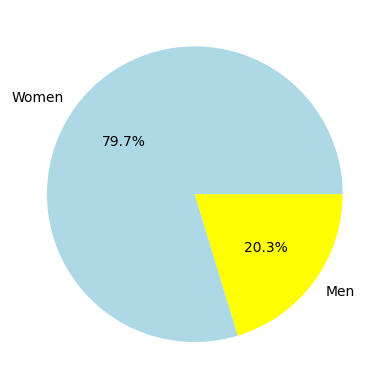

In [19]:
plt.pie(survival_rates_sex,labels=['Women','Men'],autopct='%1.1f%%',colors=['lightblue','yellow'])

In [20]:
survival_rates_class = df_train.groupby('Pclass')['Survived'].mean()

for ticket_class, rate in survival_rates_class.items():
    print(f'% of {ticket_class} class ticket people survived: {rate:.2%}')

% of 1 class ticket people survived: 62.96%
% of 2 class ticket people survived: 47.28%
% of 3 class ticket people survived: 24.24%


([<matplotlib.patches.Wedge at 0x1a49a721cd0>,
 [Text(0.10974669157197077, 1.0945116096638752, 'Ticket_class1'),
  Text(-0.6797274752124207, -0.864852912026865, 'Ticket_class2'),
  Text(0.9283540225678141, -0.5900498358462265, 'Ticket_class3')],
 [Text(0.0598618317665295, 0.5970063325439318, '46.8%'),
  Text(-0.37076044102495676, -0.4717379520146535, '35.2%'),
  Text(0.5063749214006258, -0.3218453650070326, '18.0%')])

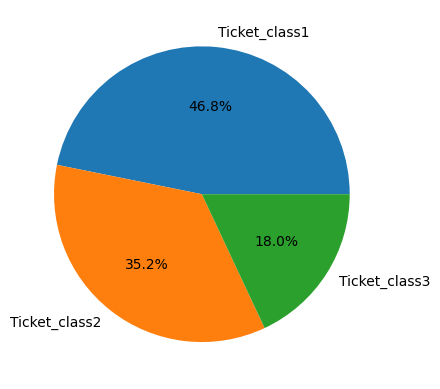

In [21]:
plt.pie(survival_rates_class,labels=['Ticket_class1','Ticket_class2','Ticket_class3'],autopct='%1.1f%%')

In [22]:
## Converting the categorical varibales into numerical varibales for better computing 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df_train["Sex"]=le.fit_transform(df_train["Sex"])
df_train["Embarked"]=le.fit_transform(df_train["Embarked"])

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [25]:
df_test["Sex"]=le.fit_transform(df_test["Sex"])
df_test["Embarked"]=le.fit_transform(df_test["Embarked"])

In [26]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [27]:
y_train = df_train["Survived"]
x_train = df_train.drop(["Survived"],axis=1)

## Model Building 

In [28]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model1 = tree.DecisionTreeClassifier(max_depth=10)
model2 = RandomForestClassifier(n_estimators=20)
model3 = SVC(C=1)
model4 = LogisticRegression(random_state=42)


In [29]:

# Create a VotingClassifier with "soft" voting
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', model1),
    ('RandomForest', model2),
    ('svm', model3),
    ('logistic_regression', model4)
], voting='hard')

# Define hyperparameters to tune
param_grid = {
    'decision_tree__max_depth': [None, 10, 20],
    'svm__C': [1, 10, 100],
    'logistic_regression__C': [0.1, 1, 10]
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=voting_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:")
print(grid_search.best_params_)

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best Hyperparameters:
{'decision_tree__max_depth': 10, 'logistic_regression__C': 10, 'svm__C': 100}


C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
test_predictions = best_classifier.predict(df_test)

In [31]:
# Saving the predictions in the DataFrame
# output = pd.DataFrame(
#     data={
#         'PassengerId': df_test['PassengerId'],
#         'Survived': test_predictions
#     }
# )

In [32]:
# # Saving the DataFrame as a csv-file
# output.to_csv('submission.csv', index=False)

# # Displaying a success message
# print("Your submission was successfully saved!")

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=150, random_state=42)

In [34]:
test_predictions_gbc =gbc.predict(df_test)

In [37]:
output = pd.DataFrame(
    data={
        'PassengerId': df_test['PassengerId'],
        'Survived': test_predictions
    }
)

In [38]:
# Saving the DataFrame as a csv-file
output.to_csv('submission_bgc.csv', index=False)

# Displaying a success message
print("Your submission was successfully saved!")

Your submission was successfully saved!
